In [1]:
import numpy as np
import networkx as nx
from scipy.stats import entropy
import matplotlib.pyplot as plt
import random

%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim

import entropy_estimators as ee

In [ ]:
from func.EI_calculation import tpm_ei
from func.p_calculation import calculate_or_p
from func.p_calculation import calculate_xor_p
from func.p_calculation import noise_modify_p

In [2]:
%run EI_calculation.ipynb

In [3]:
%run p_calculation.ipynb

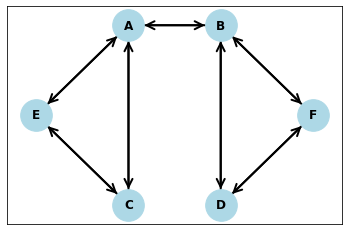

In [4]:
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B'), ('B', 'A'), ('A', 'C'), ('C', 'A'), ('A', 'E'), ('C', 'E'), ('E', 'C'), ('B', 'D'), 
                  ('D', 'B'), ('D', 'F'), ('F', 'D'), ('B', 'F'), ('E', 'A'), ('F', 'B')])
pos = {'A': (1, 2), 'B': (2, 2), 'C': (1, 0), 'D': (2, 0), 'E': (0, 1), 'F': (3, 1)}
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', font_weight='bold', arrows=True, 
                 labels={node: node for node in G.nodes()}, node_size=1000, width=2, arrowstyle='->', arrowsize=20)
plt.show()

## ACE或

In [5]:
Col = ['{:03b}0'.format(i) for i in range(8)]
ACE_B_0 = np.empty((8, 8))

for i in range(ACE_B_0.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3)  
    pa = noise_modify_p(pa, 0.1)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.1)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.1)

    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

In [6]:
Col = ['{:03b}1'.format(i) for i in range(8)]
ACE_B_1 = np.empty((8, 8))

for i in range(ACE_B_1.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3)  
    pa = noise_modify_p(pa, 0.1)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.1)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.1)
   
    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe))

In [7]:
print(tpm_ei(ACE_B_0, log_base = 2))  #同质、B为0的时候ACE的ei
print(tpm_ei(ACE_B_1, log_base = 2))  #同质、B为1的时候ACE的ei
print((tpm_ei(ACE_B_0, log_base = 2) + tpm_ei(ACE_B_1, log_base = 2)) / 2)   #异质、ACE的ei

0.4562408059655874
0.3884205694381191
0.4223306877018532


## ACE异或

In [8]:
Col = ['{:03b}0'.format(i) for i in range(8)]
ACE_B_0 = np.empty((8, 8))

for i in range(ACE_B_0.shape[0]): 
    pa = calculate_xor_p(i, 0,1,2,3)  
    pa = noise_modify_p(pa, 0.1)
    pc = calculate_xor_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.1)
    pe = calculate_xor_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.1)

    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

In [9]:
Col = ['{:03b}1'.format(i) for i in range(8)]
ACE_B_1 = np.empty((8, 8))

for i in range(ACE_B_1.shape[0]):
    pa = calculate_xor_p(i, 0,1,2,3)  
    pa = noise_modify_p(pa, 0.1)
    pc = calculate_xor_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.1)
    pe = calculate_xor_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.1)

    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe)) 

In [10]:
print(tpm_ei(ACE_B_0, log_base = 2))  #同质、B为0的时候ACE的ei
print(tpm_ei(ACE_B_1, log_base = 2))  #同质、B为1的时候ACE的ei
print((tpm_ei(ACE_B_0, log_base = 2) + tpm_ei(ACE_B_1, log_base = 2)) / 2)   #异质、ACE的ei

0.8624177306350442
0.8624177306350442
0.8624177306350442


# ACE或——BDF异或

In [11]:
Col = ['{:06b}'.format(i) for i in range(64)]
ABCDEF = np.empty((64, 64))

for i in range(ABCDEF.shape[0]):
    
    pa = calculate_or_p(i, 0,1,2,4)  
    pa = noise_modify_p(pa, 0.1)
    pc = calculate_or_p(i, 2,0,4)
    pc = noise_modify_p(pc, 0.1)
    pe = calculate_or_p(i, 4,0,2)
    pe = noise_modify_p(pe, 0.1)
    
    pb = calculate_xor_p(i, 1,0,3,5)  
    pb = noise_modify_p(pb, 0.1)
    pd = calculate_xor_p(i, 3,1,5)
    pd = noise_modify_p(pd, 0.1)
    pf = calculate_xor_p(i, 5,1,3)
    pf = noise_modify_p(pf, 0.1)

    ABCDEF[i] = np.kron(pa, np.kron(pb, np.kron(pc, np.kron(pd, np.kron(pe, pf)))))

In [12]:
print(tpm_ei(ABCDEF, log_base = 2))

1.70351918935062
